- RESİM İLE YÜZ TANIMA

Resim dosyasını OpenCV ile okuyup siyah-beyaz yapıyoruz, yüz tanıma işlemi renkli grafiklerle değil siyah-beyaz grafiklerle çalışır. Daha sonra da detectMultiscale fonksiyonu ile resimdeki yüzlerin yerlerini tespit ediyoruz, minSize parametresi ile yüze benzeyen çok küçük bölgeleri görmezden geliyoruz. Bu fonksiyon yüzlerin bulunduğu koordinatları içeren bir array nesnesi döndürür. Sonra bir döngü içinde bulunan yüzler işaretleniyor ve her bir yüz içinde gözler de tespit edilip işaretleniyor, dikdörtgen çizme işlemi OpenCV modülünün rectangle fonksiyonu ile yapılır. Son olarak çıktı resmi ekranda gösteriliyor ve programın sonlanması için kullanıcının herhangi bir tuşa basması bekleniyor.

In [1]:
import cv2
import matplotlib.pyplot as plt

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1100.5, 619.5, -0.5),
 Text(0.5, 1.0, 'Orjinal Resim'))

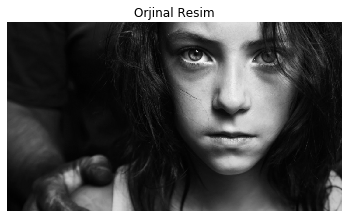

In [2]:
#resmi aktarma
img=cv2.imread("human.jpg",0)
plt.figure(),plt.imshow(img,cmap="gray"),plt.axis("off"),plt.title("Orjinal Resim")

- OpenCv Cascade Classifier: https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1100.5, 619.5, -0.5),
 Text(0.5, 1.0, 'Orjinal Resim'))

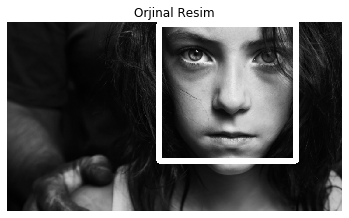

In [3]:
#burada daha önceden eğitilmiş bir sınıflandırıcılar ile fotografdaki yüzlerin tespiti sağlanır
face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
#rectangle(rect):içerisinde koordinat bilgileri saklanır
face_rect=face_cascade.detectMultiScale(img)
#tespit edilen resim üzerinde belirlenen koordinatların gösterilmesi
for(x,y,w,h) in face_rect:
    #cv2.rectangle(resim,başlangıç,bitiş,renk,kalınlık)
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),18)
plt.figure(),plt.imshow(img,cmap="gray"),plt.axis("off"),plt.title("Orjinal Resim")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 639.5, 365.5, -0.5),
 Text(0.5, 1.0, 'Orjinal Resim'))

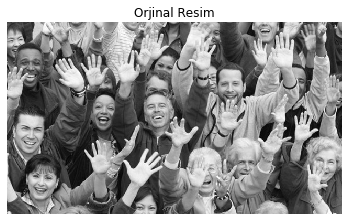

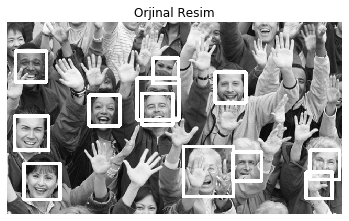

In [5]:
#resmi aktarma
img=cv2.imread("humans.jpg",0)
plt.figure(),plt.imshow(img,cmap="gray"),plt.axis("off"),plt.title("Orjinal Resim")
#burada daha önceden eğitilmiş bir sınıflandırıcılar ile fotografdaki yüzlerin tespiti sağlanır
face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
#rectangle(rect):içerisinde koordinat bilgileri saklanır
face_rect=face_cascade.detectMultiScale(img)
#tespit edilen resim üzerinde belirlenen koordinatların gösterilmesi
for(x,y,w,h) in face_rect:
    #cv2.rectangle(resim,başlangıç,bitiş,renk,kalınlık)
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),5)
plt.figure(),plt.imshow(img,cmap="gray"),plt.axis("off"),plt.title("Orjinal Resim")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 639.5, 365.5, -0.5),
 Text(0.5, 1.0, 'Orjinal Resim'))

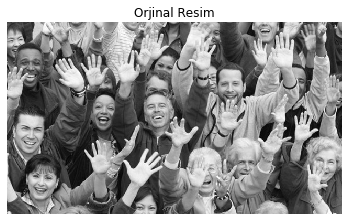

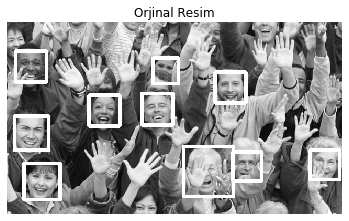

In [4]:
#resmi aktarma
img=cv2.imread("humans.jpg",0)
plt.figure(),plt.imshow(img,cmap="gray"),plt.axis("off"),plt.title("Orjinal Resim")
#burada daha önceden eğitilmiş bir sınıflandırıcılar ile fotografdaki yüzlerin tespiti sağlanır
face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
# detectMultiScale fonksiyonu parametreleri aracılığıyla daha doğru tespitler sağlanır
# minNeighbors: hatalı yüz tespitlerinden kurtulmak için kullanılır(default=3, arttıkça hatalı tespitler azalır)
face_rect=face_cascade.detectMultiScale(img,minNeighbors=5)
#tespit edilen resim üzerinde belirlenen koordinatların gösterilmesi
for(x,y,w,h) in face_rect:
    #cv2.rectangle(resim,başlangıç,bitiş,renk,kalınlık)
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),5)
plt.figure(),plt.imshow(img,cmap="gray"),plt.axis("off"),plt.title("Orjinal Resim")

- VİDEO İLE YÜZ TANIMA

In [1]:
import cv2

In [ ]:
#videodaki her bir frame için yukarıdaki işlem tekrarlanır
face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    if ret:
        face_rect=face_cascade.detectMultiScale(frame,minNeighbors=5)
        #tespit edilen resim üzerinde belirlenen koordinatların gösterilmesi
        for(x,y,w,h) in face_rect:
            #cv2.rectangle(resim,başlangıç,bitiş,renk,kalınlık)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,255),5)
        cv2.imshow("face detect",frame)
        
    if cv2.waitKey(1) & 0xFF==ord("q"):break
cap.release()
cv2.destroyAllWindows()
